#  Stroke predictions

### EDA + Various Classification models

Models such as:

Logistic Regression

SVM

Random Forests

XgBoost

adaboost 

MLP classifer


## Introduction
Through this data we will try to know more about strokes and Make a model to try to predict strokes

first what is a stroke?
Stroke is a medical emergency. A stroke occurs when blood flow to a part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die within minutes

Risk factors for having a stroke include:
Age: People aged 55 years and over

Hypertension: if the systolic pressure is 140 mm Hg or more, or the diastolic pressure is 90 mm Hg or more

Hypercholesterolemia: If the cholesterol level in the blood is 200 milligrams per deciliter

Smoking

Diabetes

Obesity: if the body mass index (BMI) is 30 or more

## Import

In [1]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


## Read Dataset

In [3]:
df=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Variance features Distribution

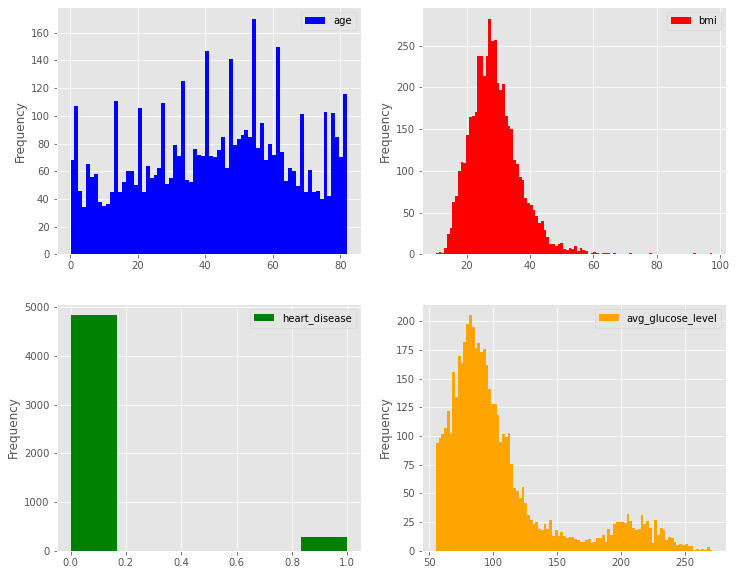

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

We have good distribution for age

I think we have outliers in bmi

Avg glucose distribution is reasonable because the normal avg of blood in sugar is less than 140 , that may be not good this feature will not be helpful to know if diabetes have correlation between diabetes and strokes


## Handling Missing Values

In [8]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  5110
Columns  :  12

Features : 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values :   201

Unique values :  
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


## EDA

### Stroke Pie Chart

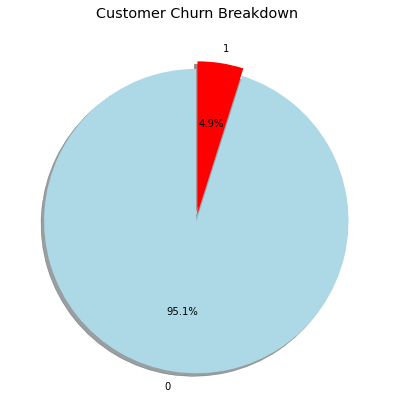

In [9]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

### Gender

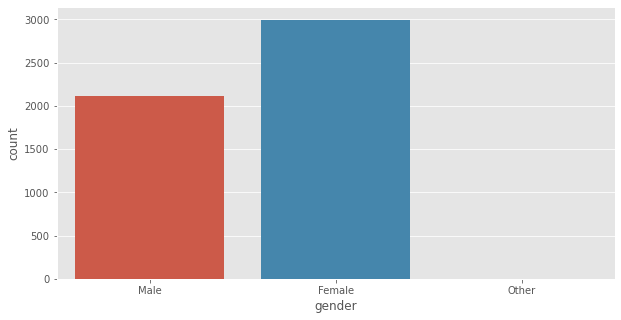

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='gender');

here is about 1000 diffrence between Female and Male in the data

### Correlation with avg glucose level
Visualize some features which maybe have correlation with avg glucose level

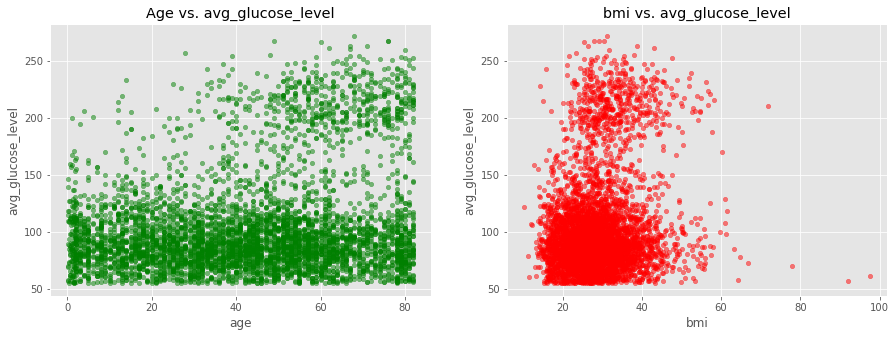

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

Avg glucose level is high with old people

BMI >40 have low avg glucose

### Stroke Or Not - Pair Grid

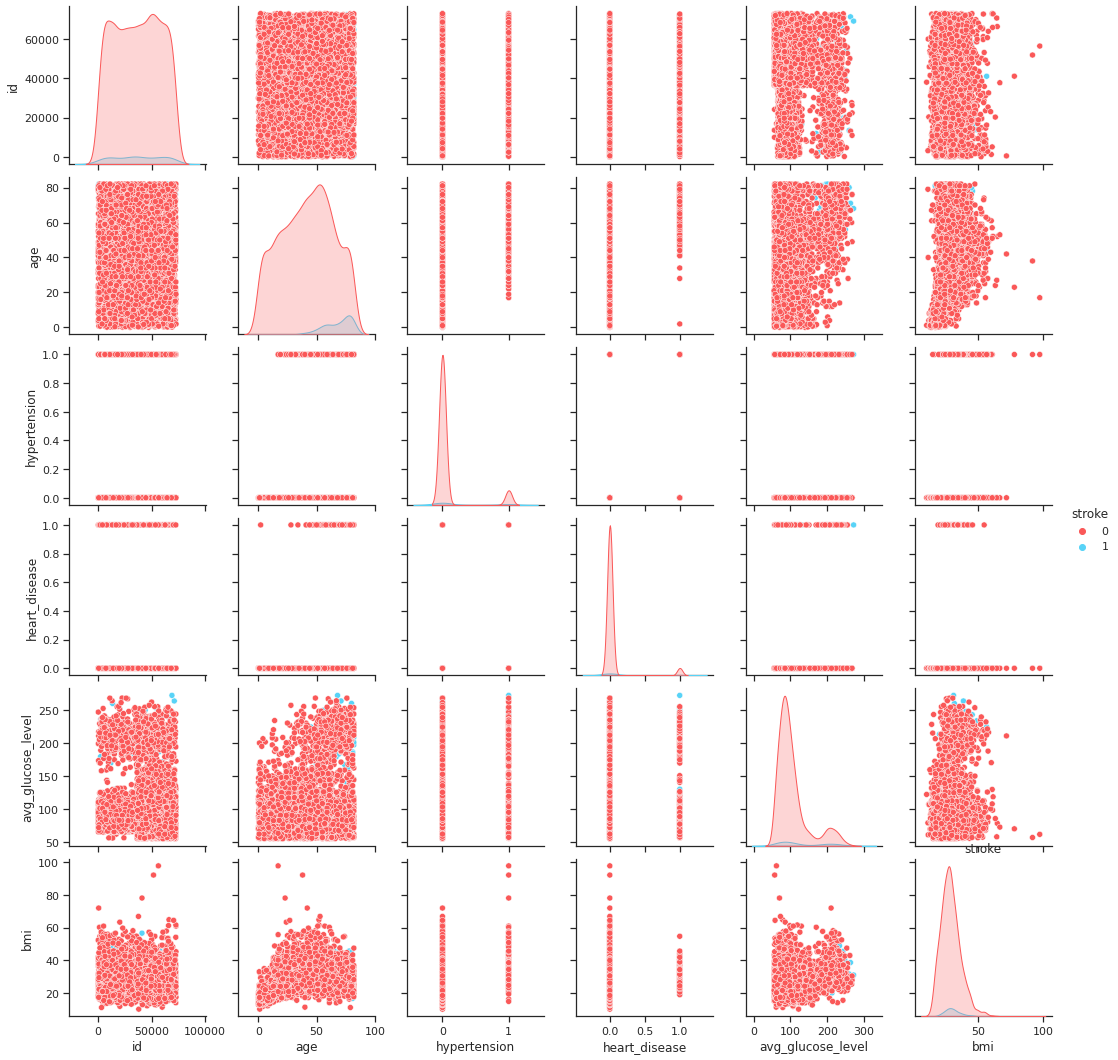

In [12]:
sns.set(style="ticks");
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="stroke", palette=pal);
plt.title("stroke");

### Heatmap Correlation

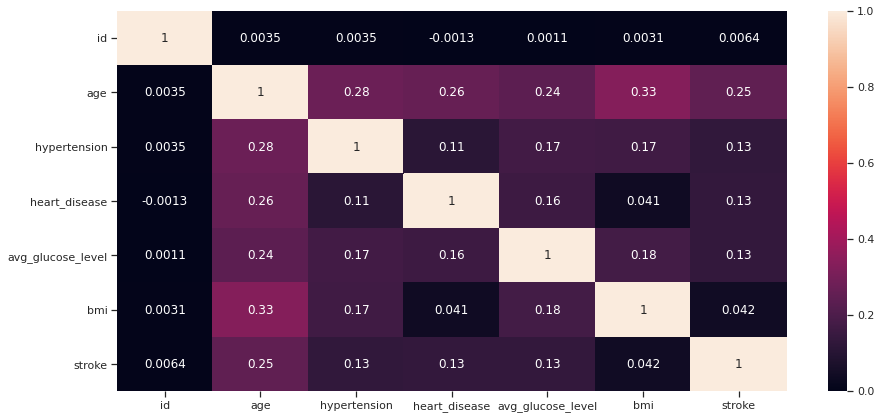

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

There is no correlation between stroke and BMI

### BMI Boxplot

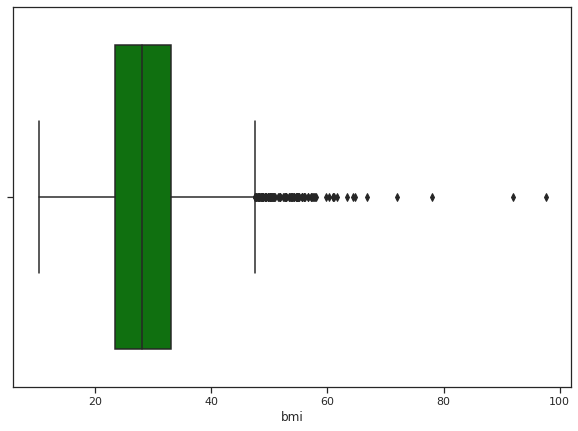

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

we have many outliers lets fix this.

In [15]:
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [16]:
# mean with outliers 
print(bmi_outliers['stroke'].value_counts())

0    78
1     1
Name: stroke, dtype: int64


In [17]:
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)
df["bmi"] = df["bmi"].fillna(28.4)

#### Double Check for missing values

In [18]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


### Stroke or not in Categorical Features

In [19]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

### Stroke/Ever Married

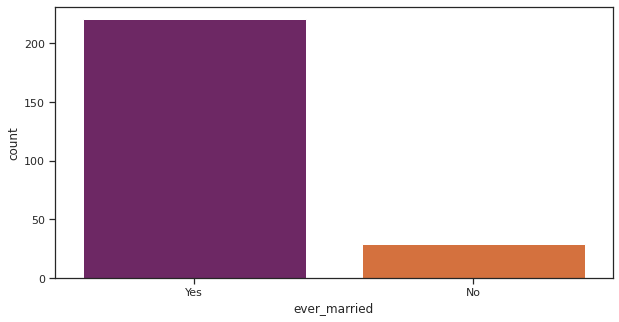

In [20]:
plt.figure(figsize=(10,5))
strok=df.loc[df['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno');

Thats interesting!

### Stroke/Work Type

plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool');

Private work exposes you to more stroke

### Stroke/Smoking Status

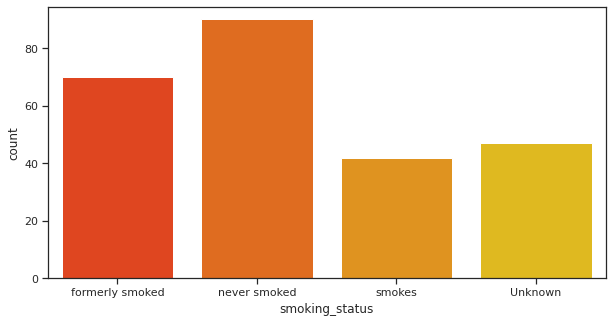

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='autumn');

Being a smoker or a formerly smoker increases your risk of having a stroke

### Residence Type

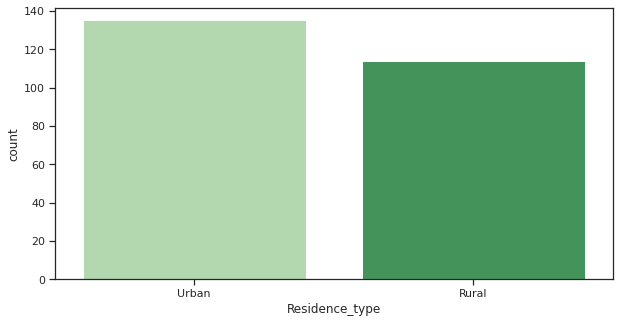

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Greens');

Residence Type has nothing to do with stroke, We cannot take it as a standard

### Stroke/Heart Disease

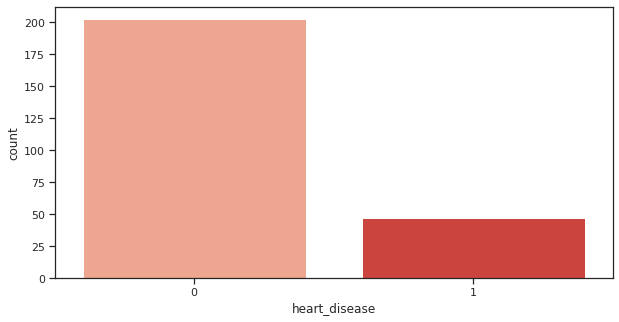

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds');

Most people who have had a stroke do not have any heart disease, but that does not prevent it being an influential factor

### Stroke/Hypertension

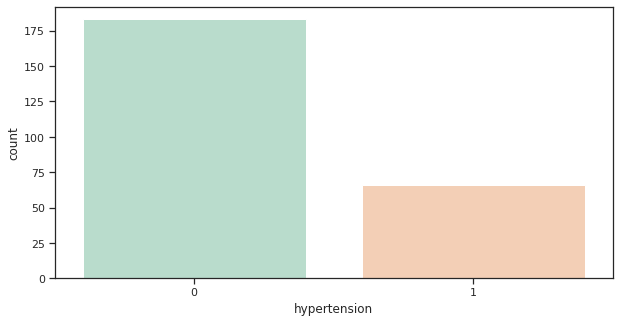

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2');

more than 25% of strok cases had hypertension

## Notes

Avg glucose level is high with old people

BMI >40 have low avg glucose

Being unmarried reduces your risk of a stroke

Being a smoker or a formerly smoker increases your risk of having a stroke

more than 25% of strok cases They had hypertension

## Data preprocessing

### Encoding Categorical Features

In [25]:
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

 
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

In [26]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.4,1,0,0,1,0,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,1,0,0
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,0,1,0


### Scaling The variance in Features

In [27]:
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [28]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df.head()

,id,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,9046,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,2.706375,1.069344,1.051434
1,51676,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,2.121559,-0.051399,0.786070
2,31112,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,-0.005028,0.508972,1.626390
3,60182,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1.437358,0.768657,0.255342
4,1665,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1.501184,-0.652774,1.582163


## Handling null values

In [29]:
# drop ID column as it is useless
df=df.drop(columns='id',axis=1)

In [30]:
df[df.isnull().any(axis=1)]

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age


# Model Ceration

### Target & Features

In [31]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

### Splitting

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### adaboost classification

In [33]:
#create adaboost classification obj
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

#training via adaboost classficiation model
ab_clf.fit(X_train, y_train)
print("training....\n")

#make prediction using the test set
ab_pred_stroke= ab_clf.predict(X_train)
print('prediction: \n', ab_pred_stroke)

print('\nparms: \n', ab_clf.get_params)

#score
ab_clf_score = ab_clf.score(X_test, y_test)
print("\nmean accuracy: %.2f" % ab_clf.score(X_test, y_test))

training....

prediction: 
 [0 0 0 ... 0 0 0]

parms: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=100, random_state=100)>

mean accuracy: 0.90


### XGboost

Training Score 0.9616997483925077
Testing Score 
 0.9471624266144814
0.9471624266144814


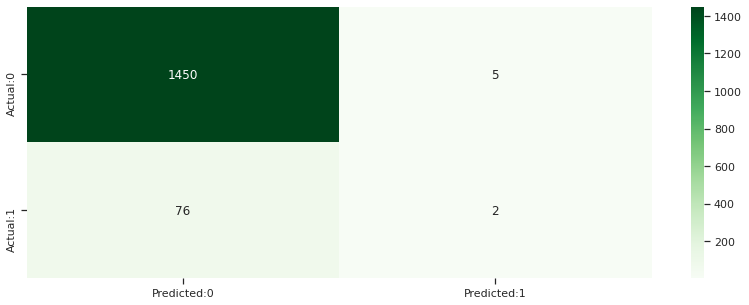

In [34]:
xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(X_train, y_train)
#== 
#Score 
#== 
xgboost_score = xgboost.score(X_train, y_train)
xgboost_test = xgboost.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = xgboost.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',xgboost_score)
print('Testing Score \n',xgboost_test)

#=== 
#Confusion Matrix 
plt.figure(figsize=(14,5))

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");
print(accuracy_score(y_test,y_pred))

### SVM

In [35]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)
#== 
#Score 
#== 
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = svc.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(cm)

Training Score 0.9521945764607213
Testing Score 
 0.949119373776908
[[1455    0]
 [  78    0]]


### Random Forest Classifier

In [36]:
forest = RandomForestClassifier(n_estimators = 100)
#== 
forest.fit(X_train, y_train)
#== 
#Score 
#== 
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = forest.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 1.0
Testing Score 
 0.9478147423352903
[[1453    2]
 [  78    0]]


### Logistic Regression

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Testing Score \n',score)
logistic_score = model.score(X_train, y_train)
logistic_test = model.score(X_test, y_test)
#== 
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print(cm)

Testing Score 
 0.949119373776908
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1455
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533

[[1455    0]
 [  78    0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Importance using Logistic Regression

In [38]:
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.12300012081345862, 0.43928005466943476, 0.20773417494877272, 0.23609477586247155, 0.08083693794473955, 0.02824262907214426, 0.0797144278633252, 0.2285751984662409, 0.17802099575186062, 0.09697536435886972, 0.030912101819279867, 0.04482917007415873, 0.3044066355367697, 0.28409013914814246, 0.12999617200819796, 0.01123125142935023, 1.7853446583820871]


In [39]:
cols = list(df.columns)
cols.index('stroke')
#== 
#Delete target label 
#== 
del cols[5]
cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'avg_glucose_level',
 'bmi',
 'age']

In [40]:
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

age
hypertension
work_type_Self-employed
work_type_children
ever_married
smoking_status_never smoked
heart_disease
smoking_status_smokes
avg_glucose_level
gender
work_type_Govt_job
Residence_type
smoking_status_formerly smoked
work_type_Private
work_type_Never_worked
smoking_status_Unknown
bmi


Although BMI is considered an indicator for recognizing strokes, there are a large number of values ​​in the normal range and not a high rate that indicates a stroke.

### MLP NN Classifier

In [41]:
X = df.drop(['stroke','gender','bmi','Residence_type','work_type_Never_worked','smoking_status_Unknown'], axis=1).values 
#X = df.drop(['stroke','bmi'], axis=1).values 
y = df['stroke'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
# mlp = MLPClassifier(hidden_layer_sizes=(1000,300, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
mlp=MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)
mlp.fit(X_train, y_train)
mlp_pred= mlp.predict(X_test)

mlp_score = mlp.score(X_train, y_train)
mlp_test = mlp.score(X_test, y_test)


y_pred =mlp.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',mlp_score)
print('Testing Score \n',mlp_test)
print(cm)

Iteration 1, loss = 0.26838797
Iteration 2, loss = 0.16672216
Iteration 3, loss = 0.15939536
Iteration 4, loss = 0.15411772
Iteration 5, loss = 0.15218920
Iteration 6, loss = 0.15049282
Iteration 7, loss = 0.14924747
Iteration 8, loss = 0.14777137
Iteration 9, loss = 0.14587146
Iteration 10, loss = 0.14569732
Iteration 11, loss = 0.14309115
Iteration 12, loss = 0.14489635
Iteration 13, loss = 0.14249351
Iteration 14, loss = 0.14732513
Iteration 15, loss = 0.14112058
Iteration 16, loss = 0.14152285
Iteration 17, loss = 0.13949301
Iteration 18, loss = 0.13576418
Iteration 19, loss = 0.13519436
Iteration 20, loss = 0.13372681
Iteration 21, loss = 0.13492407
Iteration 22, loss = 0.13122812
Iteration 23, loss = 0.13281480
Iteration 24, loss = 0.12745620
Iteration 25, loss = 0.12772677
Iteration 26, loss = 0.12720356
Iteration 27, loss = 0.12552091
Iteration 28, loss = 0.12314352
Iteration 29, loss = 0.12414910
Iteration 30, loss = 0.12287192
Iteration 31, loss = 0.12026715
Iteration 32, los

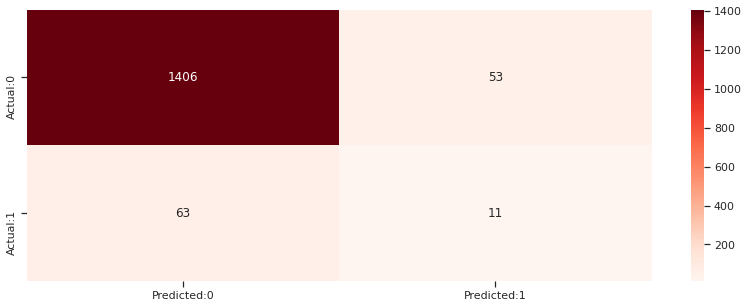

In [43]:
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

## Sensitivity & Specificity

In [44]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [45]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n')

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.9243313763861709 
 The Missclassification = 1-Accuracy =                   0.07566862361382909 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.14864864864864866 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9636737491432488 



From the above statistics it is clear that the model is more highly specific than sensitive. The negative cases are predicted more accurately than the positives.